In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score , recall_score, precision_score, f1_score
import seaborn as sns


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
train = pd.read_csv('Training.csv') 
test = pd.read_csv('Testing.csv')

In [ ]:
data = [train, test]
df = pd.concat(data)

In [ ]:
df.head(5)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.28.128.11-172.28.128.10-49331-389-6,172.28.128.11,49331,172.28.128.10,389,6,2015-10-21 09:54:02,4975,11,32,...,20,0.0,0.0,0.0,0.0,1.602165e+15,0.0,1.602165e+15,1.602165e+15,NormalTraffic
1,172.28.128.11-172.28.128.10-49332-389-6,172.28.128.11,49332,172.28.128.10,389,6,2015-10-21 09:54:02,4110,9,7,...,20,0.0,0.0,0.0,0.0,1.602165e+15,0.0,1.602165e+15,1.602165e+15,NormalTraffic
2,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,2015-10-21 09:54:25,1671818,3,0,...,0,0.0,0.0,0.0,0.0,1.602165e+15,0.0,1.602165e+15,1.602165e+15,NormalTraffic
3,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,2015-10-21 09:57:10,1672538,3,0,...,0,0.0,0.0,0.0,0.0,1.602165e+15,0.0,1.602165e+15,1.602165e+15,NormalTraffic
4,172.28.128.10-172.28.128.255-137-137-17,172.28.128.10,137,172.28.128.255,137,17,2015-10-21 09:54:20,2281415,4,0,...,8,0.0,0.0,0.0,0.0,1.602165e+15,0.0,1.602165e+15,1.602165e+15,NormalTraffic


In [ ]:
df = df.drop(['Flow ID',	'Src IP',	'Src Port',	'Dst IP',	'Dst Port',	'Protocol',	'Timestamp'], axis=1)

In [ ]:
df.head(5)

,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4975,11,32,337.0,3127.0,155.0,0.0,30.636364,51.09065,112.0,...,20,0.0,0.0,0.0,0.0,1.602165e+15,0.0,1.602165e+15,1.602165e+15,NormalTraffic
1,4110,9,7,369.0,414.0,155.0,0.0,41.000000,57.95041,112.0,...,20,0.0,0.0,0.0,0.0,1.602165e+15,0.0,1.602165e+15,1.602165e+15,NormalTraffic
2,1671818,3,0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0,0.0,0.0,0.0,0.0,1.602165e+15,0.0,1.602165e+15,1.602165e+15,NormalTraffic
3,1672538,3,0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0,0.0,0.0,0.0,0.0,1.602165e+15,0.0,1.602165e+15,1.602165e+15,NormalTraffic
4,2281415,4,0,272.0,0.0,68.0,68.0,68.000000,0.00000,0.0,...,8,0.0,0.0,0.0,0.0,1.602165e+15,0.0,1.602165e+15,1.602165e+15,NormalTraffic


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315607 entries, 0 to 56486
Data columns (total 77 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow Duration               315607 non-null  int64  
 1   Total Fwd Packet            315607 non-null  int64  
 2   Total Bwd packets           315607 non-null  int64  
 3   Total Length of Fwd Packet  315607 non-null  float64
 4   Total Length of Bwd Packet  315607 non-null  float64
 5   Fwd Packet Length Max       315607 non-null  float64
 6   Fwd Packet Length Min       315607 non-null  float64
 7   Fwd Packet Length Mean      315607 non-null  float64
 8   Fwd Packet Length Std       315607 non-null  float64
 9   Bwd Packet Length Max       315607 non-null  float64
 10  Bwd Packet Length Min       315607 non-null  float64
 11  Bwd Packet Length Mean      315607 non-null  float64
 12  Bwd Packet Length Std       315607 non-null  float64
 13  Flow Bytes/s   

In [ ]:
df['Label'].value_counts()

NormalTraffic        310419
Pivoting               2482
Reconnaissance         1084
LateralMovement         871
DataExfiltration        601
InitialCompromise       150
Name: Label, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Label= le.fit_transform(df.Label.values)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315607 entries, 0 to 56486
Data columns (total 77 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow Duration               315607 non-null  int64  
 1   Total Fwd Packet            315607 non-null  int64  
 2   Total Bwd packets           315607 non-null  int64  
 3   Total Length of Fwd Packet  315607 non-null  float64
 4   Total Length of Bwd Packet  315607 non-null  float64
 5   Fwd Packet Length Max       315607 non-null  float64
 6   Fwd Packet Length Min       315607 non-null  float64
 7   Fwd Packet Length Mean      315607 non-null  float64
 8   Fwd Packet Length Std       315607 non-null  float64
 9   Bwd Packet Length Max       315607 non-null  float64
 10  Bwd Packet Length Min       315607 non-null  float64
 11  Bwd Packet Length Mean      315607 non-null  float64
 12  Bwd Packet Length Std       315607 non-null  float64
 13  Flow Bytes/s   

In [ ]:
df.head()

,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4975,11,32,337.0,3127.0,155.0,0.0,30.636364,51.09065,112.0,...,20,0.0,0.0,0.0,0.0,1.602165e+15,0.0,1.602165e+15,1.602165e+15,3
1,4110,9,7,369.0,414.0,155.0,0.0,41.000000,57.95041,112.0,...,20,0.0,0.0,0.0,0.0,1.602165e+15,0.0,1.602165e+15,1.602165e+15,3
2,1671818,3,0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0,0.0,0.0,0.0,0.0,1.602165e+15,0.0,1.602165e+15,1.602165e+15,3
3,1672538,3,0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0,0.0,0.0,0.0,0.0,1.602165e+15,0.0,1.602165e+15,1.602165e+15,3
4,2281415,4,0,272.0,0.0,68.0,68.0,68.000000,0.00000,0.0,...,8,0.0,0.0,0.0,0.0,1.602165e+15,0.0,1.602165e+15,1.602165e+15,3


In [ ]:
print(f"There are {df.duplicated().sum()} duplicates data")
df.loc[df.duplicated(keep=False)].sort_values(by=df.columns.to_list())

There are 109552 duplicates data


,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
178374,-8,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40,0.0,0.0,0.0,0.0,1.450000e+15,0.000000e+00,1.450000e+15,1.450000e+15,3
234933,-8,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40,0.0,0.0,0.0,0.0,1.450000e+15,0.000000e+00,1.450000e+15,1.450000e+15,3
178496,-6,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40,0.0,0.0,0.0,0.0,1.450000e+15,0.000000e+00,1.450000e+15,1.450000e+15,3
236824,-6,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40,0.0,0.0,0.0,0.0,1.450000e+15,0.000000e+00,1.450000e+15,1.450000e+15,3
106754,-5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,44,0.0,0.0,0.0,0.0,1.450000e+15,0.000000e+00,1.450000e+15,1.450000e+15,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254163,4999851,2,0,64.0,0.0,32.0,32.0,32.0,0.0,0.0,...,8,0.0,0.0,0.0,0.0,1.450000e+15,0.000000e+00,1.450000e+15,1.450000e+15,3
258116,4999851,2,0,64.0,0.0,32.0,32.0,32.0,0.0,0.0,...,8,0.0,0.0,0.0,0.0,1.450000e+15,0.000000e+00,1.450000e+15,1.450000e+15,3
258229,4999851,2,0,64.0,0.0,32.0,32.0,32.0,0.0,0.0,...,8,0.0,0.0,0.0,0.0,1.450000e+15,0.000000e+00,1.450000e+15,1.450000e+15,3
94021,4999868,2,0,64.0,0.0,32.0,32.0,32.0,0.0,0.0,...,8,0.0,0.0,0.0,0.0,7.230000e+14,1.020000e+15,1.450000e+15,4.999868e+06,3


In [ ]:
df.isnull().sum()

Flow Duration                 0
Total Fwd Packet              0
Total Bwd packets             0
Total Length of Fwd Packet    0
Total Length of Bwd Packet    0
                             ..
Idle Mean                     0
Idle Std                      0
Idle Max                      0
Idle Min                      0
Label                         0
Length: 77, dtype: int64

In [ ]:
#Showing the null values as per attributes
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Flow Bytes/s    2283
dtype: int64

In [ ]:
print(df[df.isnull().any(axis=1)][null_columns].head())

       Flow Bytes/s
10117           NaN
10119           NaN
10121           NaN
13462           NaN
13770           NaN


In [ ]:
df.fillna(value=0, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315607 entries, 0 to 56486
Data columns (total 77 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow Duration               315607 non-null  int64  
 1   Total Fwd Packet            315607 non-null  int64  
 2   Total Bwd packets           315607 non-null  int64  
 3   Total Length of Fwd Packet  315607 non-null  float64
 4   Total Length of Bwd Packet  315607 non-null  float64
 5   Fwd Packet Length Max       315607 non-null  float64
 6   Fwd Packet Length Min       315607 non-null  float64
 7   Fwd Packet Length Mean      315607 non-null  float64
 8   Fwd Packet Length Std       315607 non-null  float64
 9   Bwd Packet Length Max       315607 non-null  float64
 10  Bwd Packet Length Min       315607 non-null  float64
 11  Bwd Packet Length Mean      315607 non-null  float64
 12  Bwd Packet Length Std       315607 non-null  float64
 13  Flow Bytes/s   

In [ ]:
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206533 entries, 0 to 56485
Data columns (total 77 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow Duration               206533 non-null  int64  
 1   Total Fwd Packet            206533 non-null  int64  
 2   Total Bwd packets           206533 non-null  int64  
 3   Total Length of Fwd Packet  206533 non-null  float64
 4   Total Length of Bwd Packet  206533 non-null  float64
 5   Fwd Packet Length Max       206533 non-null  float64
 6   Fwd Packet Length Min       206533 non-null  float64
 7   Fwd Packet Length Mean      206533 non-null  float64
 8   Fwd Packet Length Std       206533 non-null  float64
 9   Bwd Packet Length Max       206533 non-null  float64
 10  Bwd Packet Length Min       206533 non-null  float64
 11  Bwd Packet Length Mean      206533 non-null  float64
 12  Bwd Packet Length Std       206533 non-null  float64
 13  Flow Bytes/s   

In [ ]:
ds = df.isin([np.inf, -np.inf]).values.sum()
print(ds)

150


In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
df.fillna(value=0, inplace = True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
scaled = pd.DataFrame(scaler.transform(df),columns=df.columns)
scaled

,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.027678,0.007407,0.013968,0.001919,0.001000,0.004730,0.000000,0.001023,0.002411,0.003491,...,0.454545,0.0,0.0,0.0,0.0,0.999810,0.0,0.999810,0.999810,0.6
1,0.027509,0.005926,0.003055,0.002101,0.000132,0.004730,0.000000,0.001369,0.002735,0.003491,...,0.454545,0.0,0.0,0.0,0.0,0.999810,0.0,0.999810,0.999810,0.6
2,0.352142,0.001481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.999810,0.0,0.999810,0.999810,0.6
3,0.352283,0.001481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.999810,0.0,0.999810,0.999810,0.6
4,0.470805,0.002222,0.000000,0.001549,0.000000,0.002075,0.002796,0.002270,0.000000,0.000000,...,0.181818,0.0,0.0,0.0,0.0,0.999810,0.0,0.999810,0.999810,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206050,0.999983,0.015556,0.004365,0.006765,0.000160,0.003021,0.000000,0.001803,0.002381,0.001559,...,0.454545,0.0,0.0,0.0,0.0,0.901938,0.0,0.901894,0.901983,0.6
206051,0.805941,0.002222,0.000873,0.000706,0.000020,0.000946,0.001275,0.001035,0.000000,0.000966,...,0.181818,0.0,0.0,0.0,0.0,0.901938,0.0,0.901894,0.901983,0.6
206052,0.997479,0.014815,0.003928,0.005922,0.000144,0.003021,0.000000,0.001653,0.002336,0.001559,...,0.454545,0.0,0.0,0.0,0.0,0.901938,0.0,0.901894,0.901983,0.6
206053,0.999904,0.014815,0.004801,0.005922,0.000176,0.003021,0.000000,0.001653,0.002336,0.001559,...,0.454545,0.0,0.0,0.0,0.0,0.901938,0.0,0.901894,0.901983,0.6


In [ ]:
X = scaled.drop( 'Label', axis=1)
y = df['Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.2, random_state = 0, stratify = y)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import classification_report
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (164844, 76)
Number transactions y_train dataset:  (164844,)
Number transactions X_test dataset:  (41211, 76)
Number transactions y_test dataset:  (41211,)


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_train, y_train.ravel())
predictions = clf.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.00      0.00      0.00        30
           2       0.20      0.02      0.04       174
           3       1.00      0.95      0.97     40173
           4       0.32      0.38      0.34       497
           5       0.07      0.72      0.13       217

    accuracy                           0.94     41211
   macro avg       0.26      0.35      0.25     41211
weighted avg       0.98      0.94      0.96     41211



C:\Users\DDNest003\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DDNest003\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DDNest003\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred=predictions
from sklearn.metrics import matthews_corrcoef,cohen_kappa_score,hamming_loss
from sklearn import metrics
print("matthews_corrcoef",matthews_corrcoef(y_test, y_pred))
print("cohen_kappa_score",cohen_kappa_score(y_test, y_pred))
print("hamming_loss_score",hamming_loss(y_test, y_pred))
print("Accuracy_score",metrics.accuracy_score(y_test, y_pred))


matthews_corrcoef 0.3567917011814303
cohen_kappa_score 0.3146676418974417
hamming_loss_score 0.06124578389265002
Accuracy_score 0.93875421610735


<AxesSubplot:title={'center':'GradBoostClassifier Confusion Matrix'}>

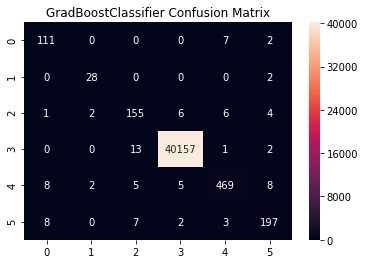

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

ocm=confusion_matrix(y_test,y_pred)
plt.title('GradBoostClassifier Confusion Matrix')
sns.heatmap(ocm,annot=True,fmt="d")

In [ ]:
import catboost
from catboost import CatBoostClassifier
cat = CatBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=0)
cat.fit(X_train, y_train.ravel())
predictions = cat.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
y_pred=predictions
from sklearn.metrics import matthews_corrcoef,cohen_kappa_score,hamming_loss
from sklearn import metrics
print("matthews_corrcoef",matthews_corrcoef(y_test, y_pred))
print("cohen_kappa_score",cohen_kappa_score(y_test, y_pred))
print("hamming_loss_score",hamming_loss(y_test, y_pred))
print("Accuracy_score",metrics.accuracy_score(y_test, y_pred))

0:	learn: 0.0642945	total: 78.9ms	remaining: 7.81s
1:	learn: 0.0411817	total: 152ms	remaining: 7.47s
2:	learn: 0.0340935	total: 224ms	remaining: 7.25s
3:	learn: 0.0291822	total: 290ms	remaining: 6.95s
4:	learn: 0.0276365	total: 370ms	remaining: 7.02s
5:	learn: 0.0206138	total: 450ms	remaining: 7.04s
6:	learn: 0.0184029	total: 514ms	remaining: 6.83s
7:	learn: 0.0173781	total: 596ms	remaining: 6.85s
8:	learn: 0.0168943	total: 661ms	remaining: 6.68s
9:	learn: 0.0160456	total: 736ms	remaining: 6.62s
10:	learn: 0.0159385	total: 806ms	remaining: 6.52s
11:	learn: 0.0156446	total: 872ms	remaining: 6.4s
12:	learn: 0.0142939	total: 941ms	remaining: 6.29s
13:	learn: 0.0139373	total: 1.01s	remaining: 6.2s
14:	learn: 0.0136001	total: 1.08s	remaining: 6.12s
15:	learn: 0.0128290	total: 1.17s	remaining: 6.16s
16:	learn: 0.0125597	total: 1.23s	remaining: 6.02s
17:	learn: 0.0122421	total: 1.3s	remaining: 5.91s
18:	learn: 0.0114213	total: 1.37s	remaining: 5.83s
19:	learn: 0.0108642	total: 1.45s	remaining

<AxesSubplot:title={'center':'CatBoostClassifier Confusion Matrix'}>

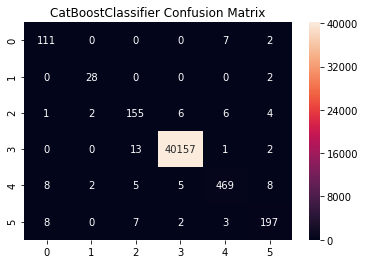

In [ ]:
ocm=confusion_matrix(y_test,y_pred)
plt.title('CatBoostClassifier Confusion Matrix')
sns.heatmap(ocm,annot=True,fmt="d")

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=0)
ada.fit(X_train, y_train.ravel())
predictions = ada.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
y_pred=predictions
from sklearn.metrics import matthews_corrcoef,cohen_kappa_score,hamming_loss
from sklearn import metrics
print("matthews_corrcoef",matthews_corrcoef(y_test, y_pred))
print("cohen_kappa_score",cohen_kappa_score(y_test, y_pred))
print("hamming_loss_score",hamming_loss(y_test, y_pred))
print("Accuracy_score",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.62      0.31       120
           1       0.00      0.10      0.00        30
           2       0.40      0.25      0.31       174
           3       1.00      0.71      0.83     40173
           4       0.68      0.44      0.53       497
           5       0.59      0.69      0.63       217

    accuracy                           0.71     41211
   macro avg       0.48      0.47      0.44     41211
weighted avg       0.99      0.71      0.82     41211

matthews_corrcoef 0.19245546568957503
cohen_kappa_score 0.08822754422298063
hamming_loss_score 0.29295576423770353
Accuracy_score 0.7070442357622965


<AxesSubplot:title={'center':'AdaBoostClassifier Confusion Matrix'}>

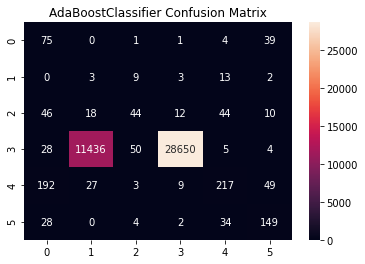

In [ ]:
ocm=confusion_matrix(y_test,y_pred)
plt.title('AdaBoostClassifier Confusion Matrix')
sns.heatmap(ocm,annot=True,fmt="d")

In [ ]:
from lightgbm import LGBMClassifier

ligh = LGBMClassifier(n_estimators=100, learning_rate=1.0, random_state=0)
ligh.fit(X_train, y_train.ravel())
predictions = ligh.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
y_pred=predictions
from sklearn.metrics import matthews_corrcoef,cohen_kappa_score,hamming_loss
from sklearn import metrics
print("matthews_corrcoef",matthews_corrcoef(y_test, y_pred))
print("cohen_kappa_score",cohen_kappa_score(y_test, y_pred))
print("hamming_loss_score",hamming_loss(y_test, y_pred))
print("Accuracy_score",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.02      0.17      0.04        30
           2       0.01      0.01      0.01       174
           3       0.98      0.84      0.91     40173
           4       0.04      0.27      0.07       497
           5       0.00      0.00      0.00       217

    accuracy                           0.83     41211
   macro avg       0.17      0.21      0.17     41211
weighted avg       0.96      0.83      0.89     41211

matthews_corrcoef 0.06177336481426842
cohen_kappa_score 0.04057433640921282
hamming_loss_score 0.1745165125815923
Accuracy_score 0.8254834874184077


<AxesSubplot:title={'center':'LGBMClassifier Confusion Matrix'}>

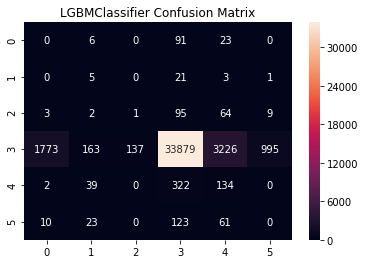

In [ ]:
ocm=confusion_matrix(y_test,y_pred)
plt.title('LGBMClassifier Confusion Matrix')
sns.heatmap(ocm,annot=True,fmt="d")

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score


xgb_mod=xgb.XGBClassifier(random_state=42,gpu_id=0) 
xgb_mod=xgb_mod.fit(X_train,y_train.ravel()) 

predictions = xgb_mod.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))
y_pred=predictions
from sklearn.metrics import matthews_corrcoef,cohen_kappa_score,hamming_loss
from sklearn import metrics
print("matthews_corrcoef",matthews_corrcoef(y_test, y_pred))
print("cohen_kappa_score",cohen_kappa_score(y_test, y_pred))
print("hamming_loss_score",hamming_loss(y_test, y_pred))
print("Accuracy_score",metrics.accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.97      0.94       120
           1       1.00      0.93      0.97        30
           2       0.94      0.98      0.96       174
           3       1.00      1.00      1.00     40173
           4       0.98      0.98      0.98       497
           5       0.97      0.97      0.97       217

    accuracy                           1.00     41211
   macro avg       0.97      0.97      0.97     41211
weighted avg       1.00      1.00      1.00     41211

matthews_corrcoef 0.9829105778573577
cohen_kappa_score 0.9829057317983112
hamming_loss_score 0.0008492878115066366
Accuracy_score 0.9991507121884934


<AxesSubplot:title={'center':'XGBoostClassifier Confusion Matrix'}>

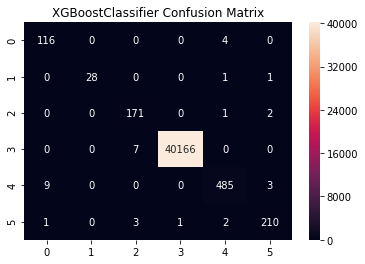

In [ ]:
ocm=confusion_matrix(y_test,y_pred)
plt.title('XGBoostClassifier Confusion Matrix')
sns.heatmap(ocm,annot=True,fmt="d")